# Multiclass Classification

In this module, we will build a Neural Networks model for Multiclass Classification.

We will use the iris dataset for this purpose.

## TensorFlow Implementation of the model

In [61]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [62]:
iris = datasets.load_iris()
x_value = iris.data
y_value = iris.target
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.33, random_state=42)

In [112]:
x_train = tf.convert_to_tensor(x_train, dtype = tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype = tf.float32)

In [113]:
net = keras.Sequential([ keras.layers.Dense(units = 20,  activation = 'relu'),
                         keras.layers.Dense(units = 10,  activation = 'relu'),
                         keras.layers.Dense(units = 5,  activation = 'relu'),
                         keras.layers.Dense(units = 3,  activation = 'softmax')])
net.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics="accuracy")

In [115]:
history = net.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
4/4 [==============================] - 0s 78ms/step - loss: 0.4874 - accuracy: 0.6800 - val_loss: 0.4383 - val_accuracy: 0.7200
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.7000 - val_loss: 0.4366 - val_accuracy: 0.7200
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4838 - accuracy: 0.6900 - val_loss: 0.4348 - val_accuracy: 0.7000
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4821 - accuracy: 0.6800 - val_loss: 0.4332 - val_accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.6700 - val_loss: 0.4318 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4793 - accuracy: 0.6700 - val_loss: 0.4305 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4787 - accuracy: 0.6500 - val_loss: 0.4292 - val_accuracy: 0.7000
Epoch 8/100
4/4 [=========

In [116]:
 train_loss = history.history['loss']
train_accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
val_loss = history.history['val_loss']

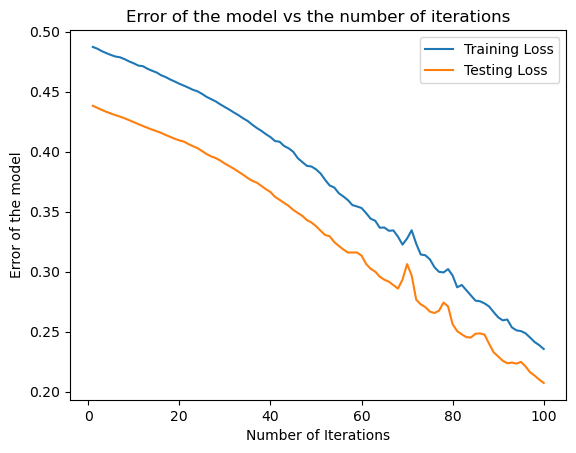

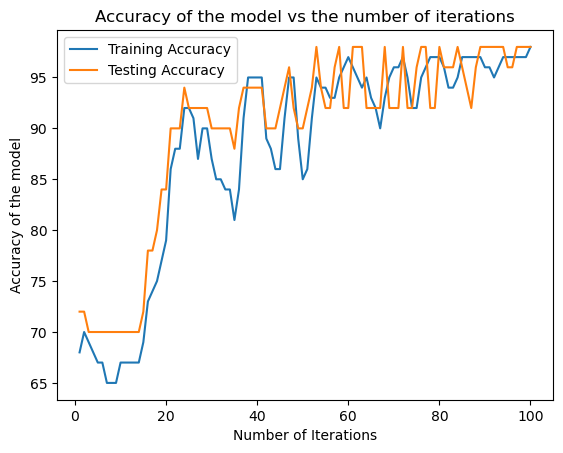

In [118]:
plt.figure()
plt.title("Error of the model vs the number of iterations")
plt.plot(range(1,101), train_loss, label = "Training Loss")
plt.plot(range(1,101), val_loss, label = "Testing Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Error of the model")
plt.legend()
plt.show()

plt.figure()
plt.title("Accuracy of the model vs the number of iterations")
plt.plot(range(1,101), np.array(train_accuracy)*100, label = 'Training Accuracy')
plt.plot(range(1,101), np.array(val_accuracy)*100, label = 'Testing Accuracy')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy of the model")
plt.legend()
plt.show()

## Pytorch Implementation of the model

In [88]:
import numpy as np
import glob
import os 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
if torch.cuda.is_available() :
    device = torch.device('cuda')
else :
    device = torch.device('cpu')

In [65]:
x_train, y_train = torch.tensor(x_train, dtype = torch.float32), torch.tensor(y_train).long()
x_test, y_test = torch.tensor(x_test, dtype = torch.float32), torch.tensor(y_test).long()

In [66]:
class Dataset(Dataset):
    
    def __init__(self,x_value,y_value):
        self.x = x_value
        self.y = y_value
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [67]:
train_data = Dataset(x_train, y_train)
test_data = Dataset(x_test, y_test)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [68]:
class neuralnet(nn.Module):
    
    def __init__(self):
        super(neuralnet, self).__init__()
        self.layer1 = nn.Linear(4,20)
        self.layer2 = nn.Linear(20,10)
        self.layer3 = nn.Linear(10, 5)
        self.layer4 = nn.Linear(5,3)
        
    def forward(self, x):
        relu = nn.ReLU()
        x1 = relu(self.layer1(x))
        x2 = relu(self.layer2(x1))
        x3 = relu(self.layer3(x2))
        x4 = self.layer4(x3)
        return x4

In [69]:
def multi_acc(y_pred, target):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    max_val, y_tags = torch.max(y_pred_softmax, dim = 1)
    
    correct_pred = (y_tags == target).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc*100)
    
    return acc

In [85]:
epochs = 100
lr = 0.01
model = neuralnet().to(device)
optim = torch.optim.Adam(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()
training_loss, testing_loss = [],[]
training_accuracy, testing_accuracy = [],[]

In [86]:
for epoch in range(epochs):
    
    batch_train_loss, batch_test_loss = [],[]
    batch_train_accuracy, batch_test_accuracy = [],[]
    
    for x_val, y_val in train_dataloader :
        x_val, y_val = x_val.to(device), y_val.to(device)
        optim.zero_grad()
        output = model(x_val)
        train_loss = criterion(output, y_val)
        train_loss.backward()
        optim.step()
        batch_train_loss.append(train_loss.cpu().detach().numpy())
        train_accuracy = multi_acc(output, y_val)
        batch_train_accuracy.append(train_accuracy.cpu().detach().numpy())
        print("Training Accuracy",train_accuracy)
        
    for x, y in test_dataloader :
        x, y = x.to(device), y.to(device)
        out = model(x)
        test_loss = criterion(out, y)
        batch_test_loss.append(test_loss.cpu().detach().numpy())
        test_accuracy = multi_acc(out, y)
        batch_test_accuracy.append(test_accuracy.cpu().detach().numpy())
        print("Testing Accuracy", test_accuracy)
        
    training_loss.append(np.array(batch_train_loss).mean())
    training_accuracy.append(np.array(batch_train_accuracy).mean())
    testing_loss.append(np.array(batch_test_loss).mean())
    testing_accuracy.append(np.array(batch_test_accuracy).mean())

Training Accuracy tensor(25., device='cuda:0')
Training Accuracy tensor(25., device='cuda:0')
Training Accuracy tensor(31., device='cuda:0')
Training Accuracy tensor(50., device='cuda:0')
Testing Accuracy tensor(28., device='cuda:0')
Testing Accuracy tensor(33., device='cuda:0')
Training Accuracy tensor(28., device='cuda:0')
Training Accuracy tensor(44., device='cuda:0')
Training Accuracy tensor(34., device='cuda:0')
Training Accuracy tensor(25., device='cuda:0')
Testing Accuracy tensor(38., device='cuda:0')
Testing Accuracy tensor(17., device='cuda:0')
Training Accuracy tensor(38., device='cuda:0')
Training Accuracy tensor(41., device='cuda:0')
Training Accuracy tensor(28., device='cuda:0')
Training Accuracy tensor(25., device='cuda:0')
Testing Accuracy tensor(28., device='cuda:0')
Testing Accuracy tensor(33., device='cuda:0')
Training Accuracy tensor(31., device='cuda:0')
Training Accuracy tensor(44., device='cuda:0')
Training Accuracy tensor(31., device='cuda:0')
Training Accuracy t

Training Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(97., device='cuda:0')
Testing Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(75., device='cuda:0')
Testing Accuracy tensor(88., device='cuda:0')
Testing Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(84., device='cuda:0')
Training Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(94., device='cuda:0')
Testing Accuracy tensor(89., device='cuda:0')
Training Accur

Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(75., device='cuda:0')
Testing Accuracy tensor(97., device='cuda:0')
Testing Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(91., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Training Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(100., device='cuda:0')
Testing Accuracy tensor(94., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(97., device='cuda:0')
Training Accuracy tensor(94., device='cuda:0')
Training 

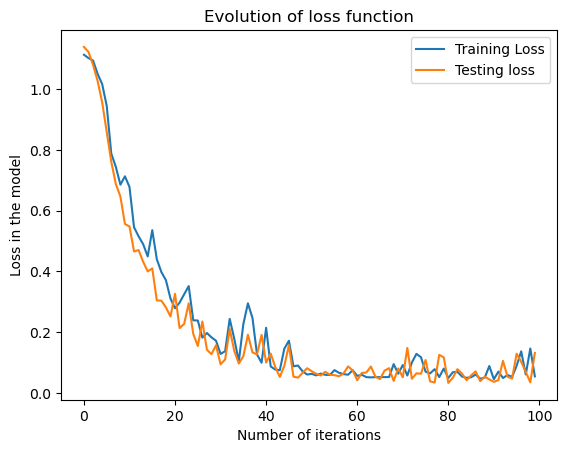

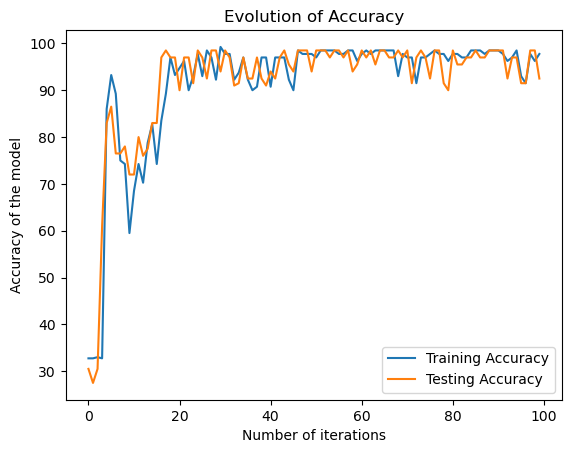

In [87]:
plt.figure()
plt.title("Evolution of loss function")
plt.plot(range(epochs),training_loss, label = "Training Loss")
plt.plot(range(epochs), testing_loss, label = "Testing loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss in the model")
plt.legend()
plt.show()

plt.figure()
plt.title("Evolution of Accuracy")
plt.plot(range(epochs), training_accuracy, label = "Training Accuracy")
plt.plot(range(epochs), testing_accuracy, label = "Testing Accuracy")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy of the model")
plt.legend()
plt.show()

In [92]:
model.to(torch.device('cpu'))
y_pred = model(x_test)
y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
max_val, y_tags = torch.max(y_pred_softmax, dim = 1)

print("Confusion Matrix for the model is")
print(confusion_matrix(y_test, y_tags))

print()

target_names = ["Setosa", "Versicolour","Virginica"]
print("The Classification report for the model is")
print(classification_report(y_test, y_tags, target_names=target_names))

Confusion Matrix for the model is
[[19  0  0]
 [ 0 15  0]
 [ 0  4 12]]

The Classification report for the model is
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
 Versicolour       0.79      1.00      0.88        15
   Virginica       1.00      0.75      0.86        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50

